## Import libraries and data

In [392]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator
import datetime
import random
from scipy import spatial
from scipy import stats


dfTrain = pd.read_csv("train.csv")
#move test to folder
dfTest = pd.read_csv("/Users/francescoperera/Downloads/test.csv")

In [12]:
def getDigitList():
    """
    getDigitList returns a list of dataframes. Each dataframe contains the pixel values for each digit(0-9)
    """
    digitList=[]
    for i in range(10):
        digitList.append(dfTrain[dfTrain.label == i].drop("label",1).reset_index().drop("index",1)) 
    return digitList

digitsList = getDigitList()

In [13]:
def getSampleDigitList(x):
    """
    getSampleDigitList returns a list of sample digits. Each digit has 28 x 28 array dimensions
    """
    sampleDigitsList=[]
    for i in range(10):
        sampleDigitsList.append(x[i].loc[0].reshape((28,28)))
    return sampleDigitsList

sampleDigits = getSampleDigitList(digitsList)

In [14]:
print sampleDigits[0].shape

(28, 28)


## b) Write a function to display an MNIST digit

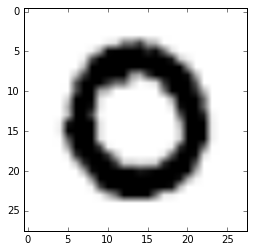

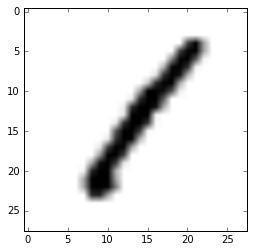

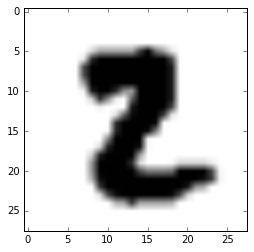

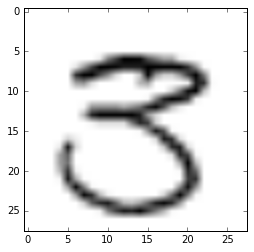

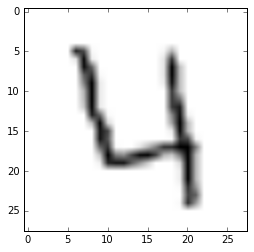

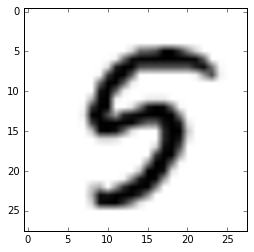

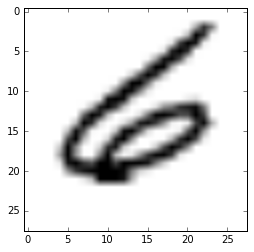

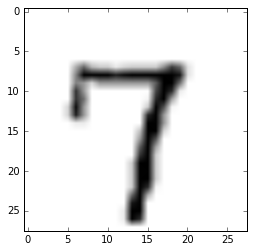

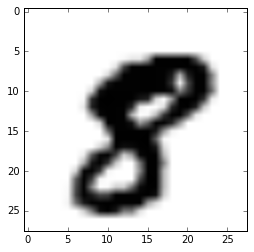

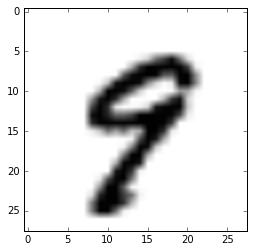

In [31]:
def plotDigits(x):
    for digit in x:
        plt.imshow(digit,cmap= cm.gray_r)
        plt.show()

plotDigits(sampleDigits)

## c) Examine the prior probability of the classes in the training data

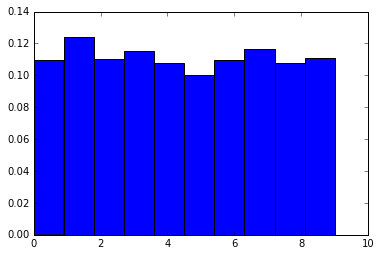

In [16]:
def plotHistogram():
    plt.hist(dfTrain.label,normed=True)
    plt.show()

plotHistogram()


## d) For each sample digit compute and show the best match between the chosen sample and the rest of the training data

In [17]:
def vicinity(sample,full):
    minDistance = None
    for val in full:
        shapedVal = val.reshape((28,28))
        distance = np.linalg.norm(sample - shapedVal) #distance == euclidean distance
        if distance == 0 or minDistance == None:
            minDistance = distance
        if minDistance > distance:
            minDistance = distance
    return minDistance

def printBestMatch(x):
    #TBD
    for distanceDict in x:
        print("digit " + str(distanceDict["digit"]) +" closest neighbor is " + str(distanceDict["closestDigit"]) 
         + " with an associated distance of " + str(distanceDict["distance"]))
        
           
def getNearestNeighborDistance(sampleDigits,allDigits):
    nearestDist=[]
    for i in range(10):
        sampleDigit = sampleDigits[i]
        nearestNeighbor = None
        for j in range(10):
            allDigitValues = allDigits[j].values
            distance = vicinity(sampleDigit,allDigitValues)
            if nearestNeighbor == None:
                nearestNeighbor = {"digit":i,"distance":distance,"closestDigit":j}
            else:
                if nearestNeighbor["distance"] > distance:
                    nearestNeighbor = {"digit":i,"distance":distance,"closestDigit":j}
            
        nearestDist.append(nearestNeighbor)
    printBestMatch(nearestDist)
    return nearestDist

nearestNeighborDist = getNearestNeighborDistance(sampleDigits,digitsList)

digit 0 closest neighbor is 0 with an associated distance of 0.0
digit 1 closest neighbor is 1 with an associated distance of 0.0
digit 2 closest neighbor is 2 with an associated distance of 0.0
digit 3 closest neighbor is 3 with an associated distance of 0.0
digit 4 closest neighbor is 4 with an associated distance of 0.0
digit 5 closest neighbor is 5 with an associated distance of 0.0
digit 6 closest neighbor is 6 with an associated distance of 0.0
digit 7 closest neighbor is 7 with an associated distance of 0.0
digit 8 closest neighbor is 8 with an associated distance of 0.0
digit 9 closest neighbor is 9 with an associated distance of 0.0


## e) Compute pairwise distances for all genuine and impostor matches for digits 0 and 1. Plot histograms.

In [18]:
binaryDigits = digitsList[:2]
binarySample = sampleDigits[:2]

In [23]:
def getDistance(digit1,digit2):
    dist=[]
    print(len(digit1))
    print(len(digit2))
    for i in range(len(digit1)):
        for j in range(len(digit2)):
            distance = np.linalg.norm(digit1[i] - digit2[j])
            #print distance
            dist.append(distance)
    return dist

start = datetime.datetime.now()
genuineZero = getDistance(binaryDigits[0].values,binaryDigits[0].values)
zero = datetime.datetime.now()
genuineOne = getDistance(binaryDigits[1].values,binaryDigits[1].values)
one = datetime.datetime.now()
impostor = getDistance(binaryDigits[0].values,binaryDigits[1].values)
end = datetime.datetime.now()
print start
print zero
print one
print end

4132
4132
4684
4684
4132
4684


## Histogram plot of genuine zero  vs imposter pair

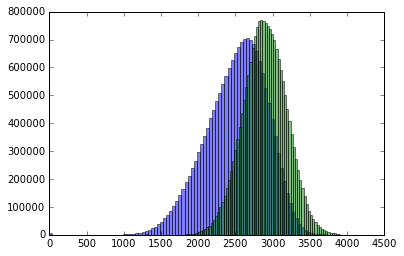

In [24]:
plt.hist(genuineZero, bins=100, alpha=.5, label="genuine")
plt.hist(impostor, bins=100, alpha=.5, label="imposter")
plt.show()

## Histogram plot of genuine one vs imposter pair

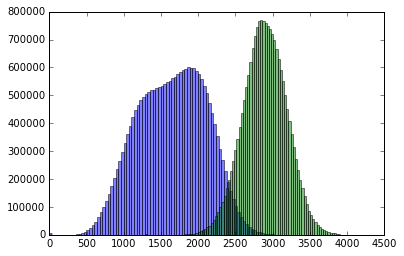

In [33]:
plt.hist(genuineOne, bins=100, alpha=.5, label="genuine")
plt.hist(impostor, bins=100, alpha=.5, label="imposter")
plt.show()

## f) Generate ROC curve

## Sensitivity and Specificity Note:
- TP: imposter correctly identified as imposter
- TN: genuine correctly identified as genuine
- FP: genuine incorrectly identified as imposter
- FN: imposter incorrectly identified as genuine




|  | Genuine | Imposter |
|:-----------|------------:|:------------:|
| Genuine      |       TP |     FN    
| Imposter     |       FP|    TN   
* rows = actual 
* columns = predictions


In [40]:
def getROCRates(gen,imp,thRate):
    tpr = []
    fpr = []
    
    th = 0
    genIdx = 0
    impIdx = 0
    
    tp = 0
    fp = 0
    tn = len(imp) - tp
    fn = len(gen) - fp
    
    while th < max(gen[-1],imp[-1]):
        
        for i in xrange(genIdx,len(gen)):
            #with classification, we want the genuine matches to be as low as possible. Hence,
            # we look for genuines that are below the threshold
            if gen[i] <= th:
                tp+=1
                fn = len(gen) - tp
                genIdx+=1
            else:
                break
        for j in xrange(impIdx,len(imp)):
            if imp[j] < th:
                fp+=1
                tn = len(imp) - fp
                impIdx+=1
            else:
                break
                
        tpr.append(float(tp)/(tp + fn))
        fpr.append(float(fp)/(fp + tn))
        th+=thRate
    
    rates ={"tpr":tpr,"fpr":fpr}
    return rates

ratesZero = getROCRates(sorted(genuineZero),sorted(impostor),100)
ratesOne = getROCRates(sorted(genuineOne),sorted(impostor),100)

## ROC curve for zero

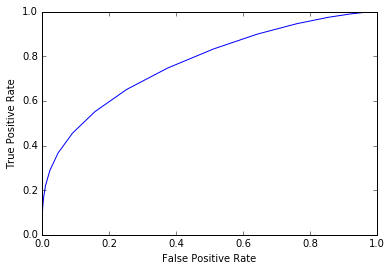

In [45]:
plt.plot(ratesZero["fpr"],ratesZero["tpr"])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## ROC curve for one

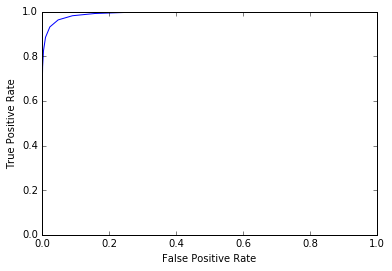

In [44]:
plt.plot(ratesOne["fpr"],ratesOne["tpr"])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Equal Error Rate

The equal error rate is the rate at which the false acceptance rate ( false positive ) and false rejection rate(false negative) are equal.

## g) Implement a K-NN classifier

In [51]:
l=[0,5,7,9,11]
def add(x,l,idx):
    while idx < len(l):
        if x <= l[idx]:
            l.insert(idx,x)
            l.pop()
            return l
        idx +=1
b = add(8,l,0)
print b
c = add(-1,l,0)
print c

[0, 5, 7, 8, 9]
[-1, 0, 5, 7, 8]


In [245]:
class KNNTable:
    def __init__(self,k):
        self.size = k
        self.keys = [-1] * k
        self.data = [None] * k
        self.counter = 0
    
    def add(self,key,val):
        if self.counter == self.size:
            if key < self.keys[-1]:
                self.substituteAtPos(key,self.keys,val,self.data)
                #self.insertVal(key,val)
            else:
                return
        if self.counter < self.size:
            if self.counter == 0:
                self.keys[0] = key
                self.data[0] = val
                self.counter+=1
                return
            else:
                self.insertToPos(key,self.keys,val,self.data)
                #self.insertVal(key,val)
                self.counter+=1
                return
            
    def insertToPos(self,key,keyList,val,valList):
        i = 0
        while i < len(keyList):
            if key <= keyList[i]:
                keyList.insert(i,key)
                keyList.pop()
                valList.insert(i,val)
                valList.pop()
                return 
            else:
                keyList.insert(self.counter,key) #use self.counter as index pointer
                keyList.pop()
                valList.insert(self.counter,val)
                valList.pop()
                break
            i+=1
            
    def substituteAtPos(self,key,keyList,val,valList):
        i = 0
        while i < len(keyList):
            if key <= keyList[i]:
                keyList.insert(i,key)
                keyList.pop()
                valList.insert(i,val)
                valList.pop()
                return 
            i+=1
            
    def insertVal(self,key,val):
        idx = self.keys.index(key)
        self.data[idx] = val

In [236]:
# k = KNNTable(5)
# print k.size
# print k.counter
# print k.keys
# print k.data
# k.add(10,"red") # add
# print k.counter
# print k.keys
# print k.data
# k.add(0,"blue")# add
# print k.counter
# print k.keys
# print k.data
# k.add(4,"yellow") # add
# print k.counter
# print k.keys
# print k.data
# k.add(7,"green") #add
# print k.counter
# print k.keys
# print k.data
# k.add(9,"orange") # add
# print k.counter
# print k.keys
# print k.data
# k.add(11,"black")# not add
# print k.counter
# print k.keys
# print k.data
# k.add(100,"pink") # not add
# print k.counter
# print k.keys
# print k.data
# k.add(0,"poop") #add

#result
# 5
# [0, 0, 4, 7, 9]
# ['poop', 'blue', 'yellow', 'green', 'orange']

In [409]:
# def getDistanceMatrix(train,test):
#     dist = spatial.distance.cdist(train, test)
#     print dist
#     print
#     return dist.argsort(axis=1)

# def majorityVote(knnTable):
#     labels = knnTable.data
#     votes ={}
#     for i in range(len(labels)):
#         if labels[i] in votes.keys():
#             votes[labels[i]]+=1
#         else:
#             votes[labels[i]] = 1
#     pred = max(votes.iteritems(), key=operator.itemgetter(1))[0]
#     return pred

    

# def KNN(trainPoints,testInstance,trainLabels,k):
#     table = KNNTable(k)
#     #trainPointHistory = {} 
#     for i in range(len(trainPoints)):
#         # add something like if testIstance already in history do not compute distance get it from history
#         trainPointDist = getEuclideanDistance(trainPoints[i],testInstance)
#         table.add(trainPointDist,trainLabels[i])
        
#     prediction = majorityVote(table)
#     return prediction
    
  
        
    

In [275]:
start = datetime.datetime.now()
labels = dfTrain.label.values
#testLabel = dfTrain.label.values[41000:42000]
sampleTrain = dfTrain.drop("label",1).values
test = dfTest.values #dfTrain.drop("label",1).values[41000:42000]

predictedLabel = []
for i in range(len(test)):
    if i % 1000 == 0:
        print i
    expected = KNN(sampleTrain,test[i],labels,5)
    predictedLabel.append(expected)

end = datetime.datetime.now()    

# correct = 0
# incorrect = 0
# for i in range(len(testLabel)):
#     if testLabel[i] == predictedLabel[i]:
#         correct+=1
#     else:
#         incorrect+=1
        
# print float(correct)/len(predictedLabel)
print start
print end

0
1000
2000


KeyboardInterrupt: 

In [435]:
def getDistanceMatrix(train,test):
    dist = spatial.distance.cdist(test, train)
    return dist

def matrixTo2DDict(matrix,k):
    """ each row in matrix is a testInstance and each column value is a distance to a corresponding
        training point. Keys in dict are row indices and  values are array of tuple. Each tuple contains
        the column index and the 
    """
    #distanceDict = dict(enumerate(dict(enumerate(arr)) for arr in matrix))
    distanceDict= dict(enumerate(sorted(enumerate(arr),key=operator.itemgetter(1))[:k] for arr in matrix))
    return distanceDict
    
def computePredictions(distance,labels):
    pred = []
    for key in distance.keys():
        #distance.keys() is sorted
#         neighborLabels = []
#         for neighbor in distance[key]:
#             neighborLabels.append(labels[neighbor[0]])
        kNeighborsLabels = getNeighborsLabels(key,distance,labels)
        modeNeighbor = stats.mode(kNeighborsLabels)[0]
        pred.append(random.choice(modeNeighbor))
    return pred

def getNeighborsLabels(key,dist,labels):
    neighborLabels =[]
    for neighbor in dist[key]:
        neighborLabels.append(labels[neighbor[0]])
    return neighborLabels
    

def kNN(train,test,trainLabels,k):
    distanceMatrix = getDistanceMatrix(train,test)
    distanceDict = matrixTo2DDict(distanceMatrix,k)
    predictions = computePredictions(distanceDict,trainLabels)
    return predictions
    

## Test run - time

In [ ]:
s =  datetime.datetime.now()
preds = kNN(dfTrain.drop("label",1).values[:41000],dfTrain.drop("label",1).values[41000:42000],dfTrain["label"].values[:41000],5)
e =  datetime.datetime.now()

print s
print e

correct = 0
incorrect = 0
for i in range(len(preds)):
    if preds[i] == dfTrain["label"].values[i+41000]:
        correct+=1
    else:
        incorrect+=1
        
print float(correct)/ 1000

## h) perform 3 fold cross-validation

In [270]:
print dfTrain.shape
print dfTest.shape

(42000, 785)
(28000, 784)


In [425]:
print 

[]